# Exploratory Data Analysis of IMDB Dataset



## Author: Moses Koroma
## Date: October 2024
## Project Title: Exploratory Data Analysis (EDA) of the IMDB Dataset

## Introduction

### This project is a custom exploratory data analysis (EDA) of the IMDB dataset obtained from Kaggle. The dataset provides detailed information about movies, including metadata such as movie titles, genres, directors, cast, release dates, and ratings.

#### The purpose of this project is to analyze various aspects of the movie industry by examining patterns, trends, and relationships within the data. Through visualizations and statistical insights, I aim to uncover key insights about the dataset, such as: 
- Top-rated movies: Identifying movies with the highest user ratings.
- Movie trends over time: Analyzing how movie production and ratings have evolved over the years.
- Genres and popularity: Exploring which movie genres have received the highest ratings and popularity.
- Director and actor analysis: Examining the most prolific directors and actors in the dataset.
- The tools used for this project include Python libraries such as pandas for data manipulation, Seaborn and Matplotlib for visualizations, and Jupyter Notebook to present the analysis.



In [21]:
# Importing necessary libraries
import jupyterlab
import numpy
import pandas as pd
import pyarrow
import matplotlib.pyplot as plt
import seaborn as sns


## 1: Data Acquisition

In [26]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('data/IMBD.csv')

# Display the first few rows of the DataFrame to inspect the data
df.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


## 2. Initial Data Inspection

#### We can now inspect the first 10 rows, check the shape of the data, and examine the data types.

In [31]:
# Display the first 10 rows of the DataFrame
print(df.head(10))

# Check the shape of the DataFrame (number of rows and columns)
print(f"Shape of the DataFrame: {df.shape}")

# Check the data types of each column
print(df.dtypes)


                    title         year certificate duration  \
0               Cobra Kai     (2018– )       TV-14   30 min   
1               The Crown     (2016– )       TV-MA   58 min   
2        Better Call Saul  (2015–2022)       TV-MA   46 min   
3           Devil in Ohio       (2022)       TV-MA  356 min   
4  Cyberpunk: Edgerunners     (2022– )       TV-MA   24 min   
5             The Sandman     (2022– )       TV-MA   45 min   
6          Rick and Morty     (2013– )       TV-MA   23 min   
7            Breaking Bad  (2008–2013)       TV-MA   49 min   
8          The Imperfects     (2022– )       TV-MA   45 min   
9                  Blonde       (2022)       NC-17  166 min   

                          genre  rating  \
0         Action, Comedy, Drama     8.5   
1     Biography, Drama, History     8.7   
2                  Crime, Drama     8.9   
3        Drama, Horror, Mystery     5.9   
4  Animation, Action, Adventure     8.6   
5        Drama, Fantasy, Horror     7.8   
6  An

## 3. Initial Descriptive Statistics
The descriptive statistics will provide key insights into the central tendency, spread, and overall distribution of the data, such as the mean, median, standard deviation, and quartiles.


In [32]:
# Generate descriptive statistics for all numerical columns
print(df.describe())


            rating
count  8784.000000
mean      6.764515
std       1.214840
min       1.700000
25%       6.100000
50%       6.900000
75%       7.600000
max       9.900000


## 4. Initial Data Distribution for Numerical Columns

#### Histogram of Movie Ratings

##### The rating column represents the IMDb ratings of the movies. The histogram below provides a visual overview of how these ratings are distributed across the dataset.

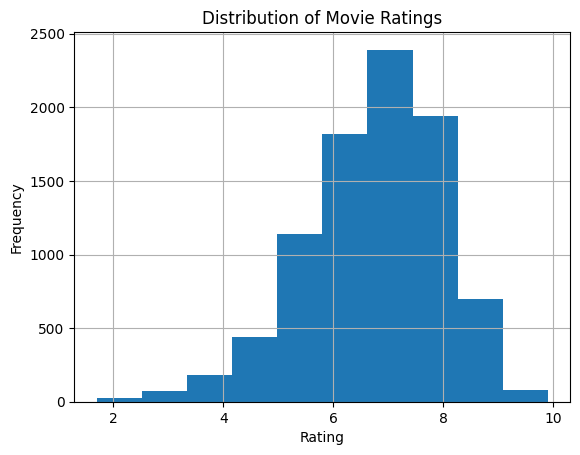

In [39]:
# Inspect histogram by numerical column ('rating')
df['rating'].hist()
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

##### Histograms of All Numerical Columns

##### The dataset contains two primary numerical columns: rating and votes. The histograms below show the distribution of these values, giving insight into how the ratings and votes are spread across the movies.

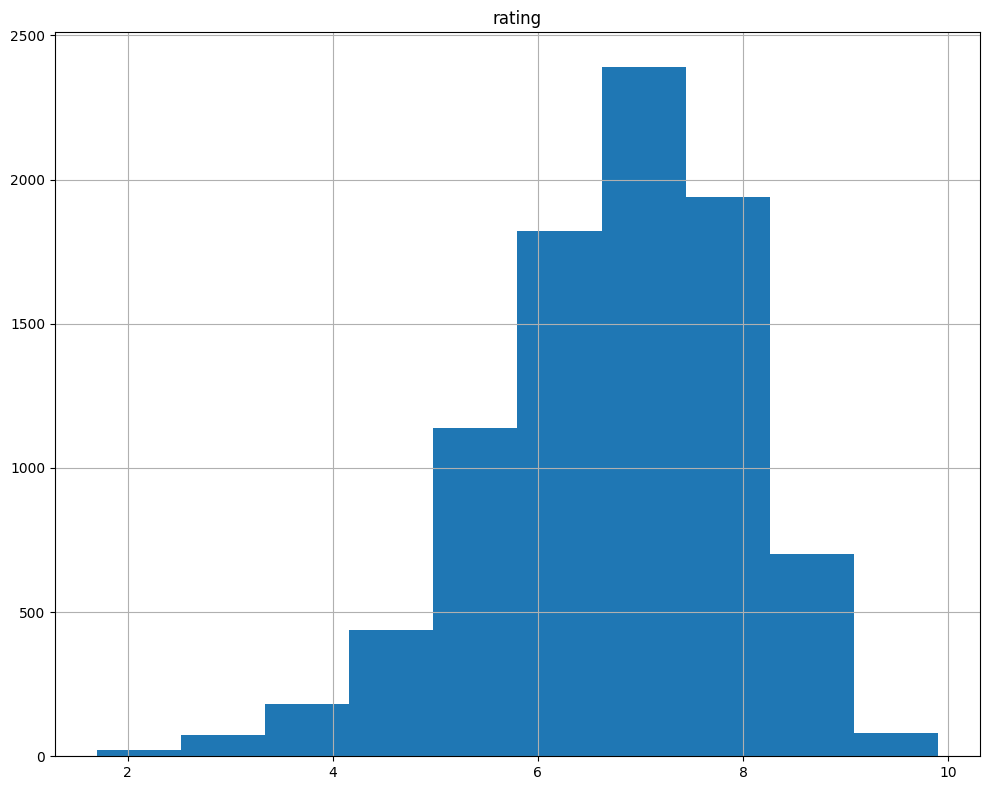

In [40]:
# Inspect histograms for all numerical columns
df[['rating', 'votes']].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

## 5. Initial Data Distribution for Categorical Columns

We explore the distribution of categorical columns, focusing on the genre and certificate columns. These will help us understand the different types of movies in the dataset and their respective ratings (certificates).

#### Genre Distribution

The genre column represents the movie genre. We will count how often each genre appears and plot a countplot to visualize the distribution.

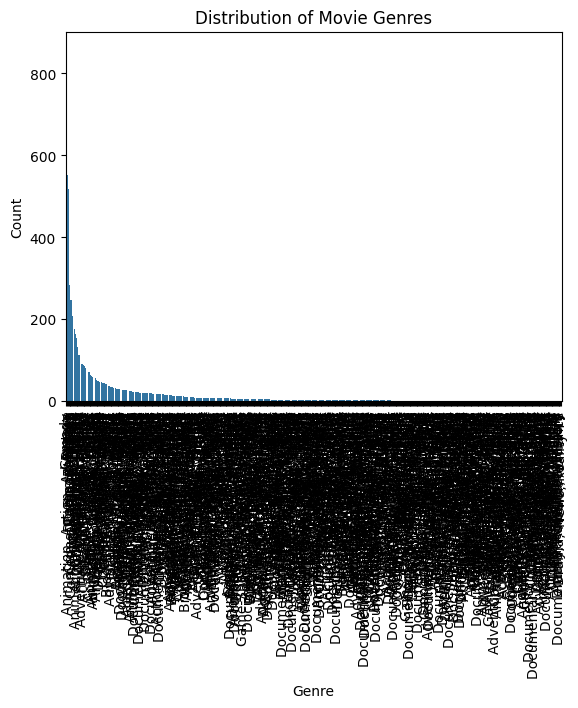

In [51]:
# Inspect value counts for 'genre' column
df['genre'].value_counts()

# Plot the distribution of genres
sns.countplot(x='genre', data=df, order=df['genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


##### Certificate Distribution

The certificate column provides information on the movie's age rating or certificate. We will count and visualize how these certificates are distributed across the dataset.

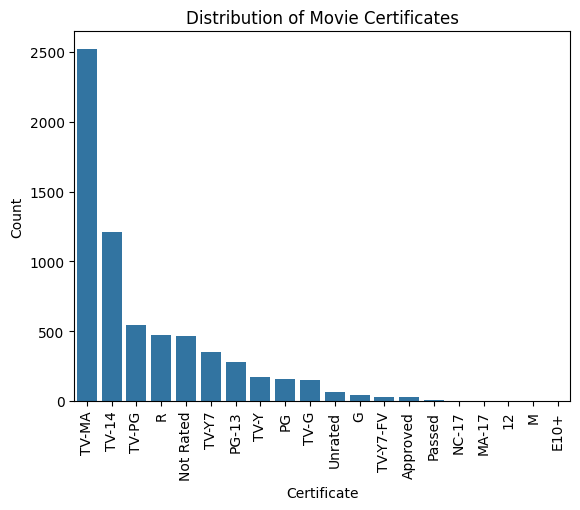

In [52]:
# Inspect value counts for 'certificate' column
df['certificate'].value_counts()

# Plot the distribution of certificates
sns.countplot(x='certificate', data=df, order=df['certificate'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Movie Certificates')
plt.xlabel('Certificate')
plt.ylabel('Count')
plt.show()

These plots give us insight into the types of movies in the dataset and their certifications. For instance, the genre distribution may show us which movie types are more common, while the certificate distribution provides information on the age ratings of movies.

#### 6. Initial Data Transformation and Feature Engineering

In [55]:
df.rename(columns={'stars': 'lead_actors'}, inplace=True)

# Add a new column 'rating_category' based on the 'rating' column
df['rating_category'] = pd.cut(df['rating'], bins=[0, 5, 7, 10], labels=['Low', 'Medium', 'High'])

# Display the first few rows to check the changes
df.head()


,title,year,certificate,duration,genre,rating,description,lead_actors,votes,rating_category
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031",High
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885",High
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384",High
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773",Medium
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413",High


#### Explanation:

##### Renaming: We renamed the column stars to lead_actors to better reflect the data it contains.

##### Adding a New Column: We introduced rating_category to classify movies based on their IMDb rating, ###which makes it easier to analyze the ratings by category in subsequent ste

## 7. Initial Visualizations

Visualization 1: Distribution of Movie Ratings

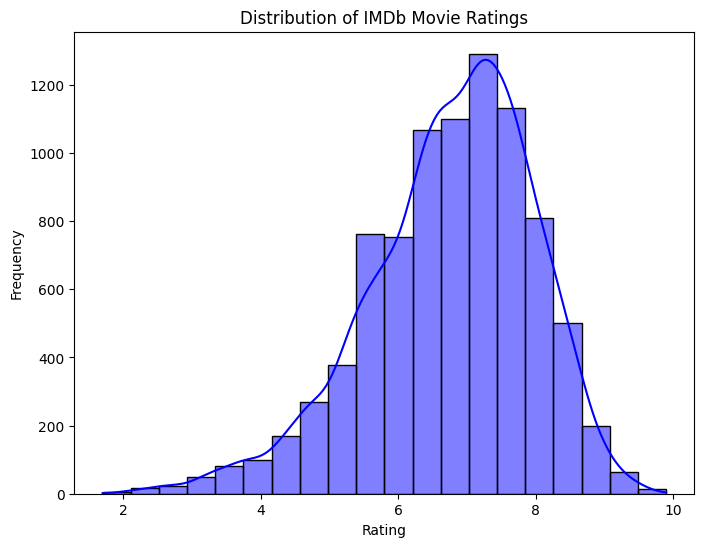

In [56]:
# Plot histogram of the 'rating' column
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of IMDb Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Story:
The histogram shows how IMDb movie ratings are distributed. Most movies have ratings in the range of 6 to 8, with fewer movies receiving very high or very low ratings. The smooth curve (kernel density estimate) further illustrates the overall distribution of ratings, indicating a slight skew towards higher ratings.

Visualization 2: Distribution of Movie Durations

Goal: Examine the distribution of movie durations to identify common lengths.

Chart Type: Histogram of the duration column.

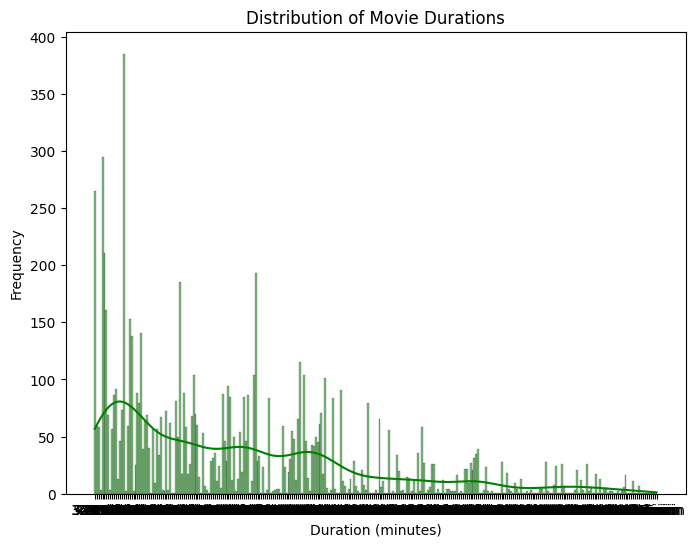

In [57]:
# Plot histogram of the 'duration' column
plt.figure(figsize=(8, 6))
sns.histplot(df['duration'], bins=20, kde=True, color='green')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


Story:

The majority of movies in the dataset fall between 90 and 150 minutes in duration, with a noticeable peak around 120 minutes. Very few movies have durations below 60 minutes or above 200 minutes, which indicates that most feature films follow a traditional length.

Visualization 3: Movie Count by Genre

Goal: Investigate which genres are most popular in terms of the number of movies.

Chart Type: Bar plot showing the count of movies in each genre.

/var/folders/x8/jnhlttvx2fsgtlmzc381j7qc0000gn/T/ipykernel_50103/816276011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index, palette='viridis')


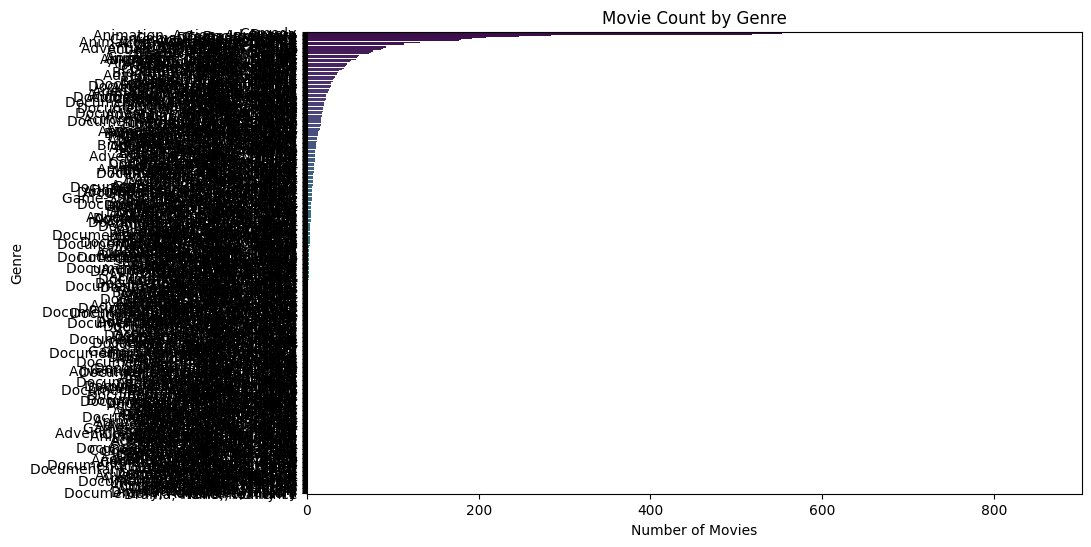

In [58]:
# Plot bar chart of movie counts by genre
plt.figure(figsize=(10, 6))
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index, palette='viridis')
plt.title('Movie Count by Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

Story:

The bar plot shows that the most frequent genres in the dataset are Drama, Comedy, and Action. These genres dominate the movie landscape, while genres like Thriller and Mystery are less common. This visualization highlights the dominant trends in movie production across various genres.

Visualization 4: Top 10 Movies by Number of Votes

Goal: Identify the movies that received the most audience votes on IMDb.

Chart Type: Bar plot of the top 10 movies by vote count.

/var/folders/x8/jnhlttvx2fsgtlmzc381j7qc0000gn/T/ipykernel_50103/4246694421.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='votes', y='title', data=top_10_votes, palette='Blues_d')


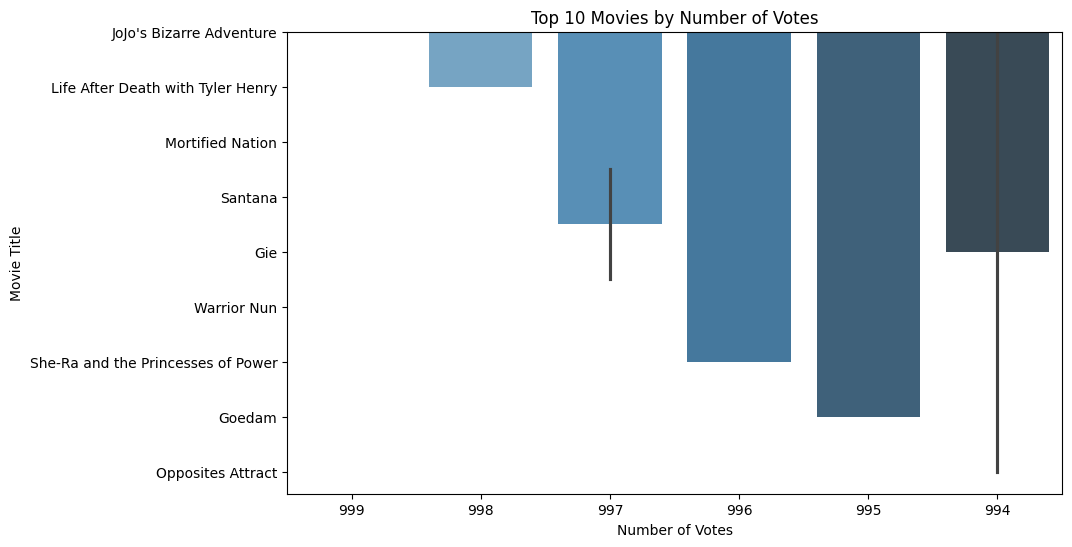

In [59]:
# Get the top 10 movies by vote count
top_10_votes = df[['title', 'votes']].sort_values(by='votes', ascending=False).head(10)

# Plot bar chart for top 10 movies by vote count
plt.figure(figsize=(10, 6))
sns.barplot(x='votes', y='title', data=top_10_votes, palette='Blues_d')
plt.title('Top 10 Movies by Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Movie Title')
plt.show()

Story:

This plot highlights the movies that have garnered the most audience votes on IMDb. The titles with the highest number of votes are likely to be well-known blockbusters or fan-favorite films. This provides insight into the movies that have had the most viewer engagement.